In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
data = pd.read_excel('data.xlsx',header=[1]) #hoặc data = pd.read_excel('data.xlsx',skiprows=1)
data.head()

,State,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
0,Alabama,117600,42081,22984,71.1
1,Alaska,229100,66521,30726,64.7
2,Arizona,215000,50448,25680,67.4
3,Arkansas,102300,39267,21274,67.7
4,California,458500,60883,29188,57.4


### <marquee direction="left"> <span style="color:palevioletred"> *1/ Tính toán mean, median, range và standard deviation của mỗi biến. Tổng hợp và trình bày kết quả vào 1 bảng.* </span> </marquee>

In [4]:
var = data.columns[1:]

In [5]:
in4 = []
for i in range (len(var)):
  in4.append((var[i],round(data[var[i]].mean(),2)
                    ,round(data[var[i]].median(),2)
                    ,round(data[var[i]].max()-data[var[i]].min(),2)
                    ,round(data[var[i]].std(),2)))
in4

[('Home Value', 204107.84, 173300.0, 442900, 98746.57),
 ('HH Inc', 51776.39, 49424.0, 32766, 8357.42),
 ('Per Cap Inc', 26983.2, 25803.0, 22101, 4329.31),
 ('Pct Owner Occ', 67.87, 69.2, 31.1, 5.38)]

In [6]:
df = pd.DataFrame(data = in4, columns = ['Var', 'mean', 'median', 'range', 'standard deviation'])
df

,Var,mean,median,range,standard deviation
0,Home Value,204107.84,173300.0,442900.0,98746.57
1,HH Inc,51776.39,49424.0,32766.0,8357.42
2,Per Cap Inc,26983.20,25803.0,22101.0,4329.31
3,Pct Owner Occ,67.87,69.2,31.1,5.38


### <marquee direction="left"> <span style="color:palevioletred"> *2/ Tạo 1 frequency histogram cho mỗi biến để xác định hình dạng của phần phối dữ liệu. Lưu ý mỗi chart cần có tiêu đề và các trục của biểu đồ cần được ghi chú rõ ràng.* </span> </marquee>

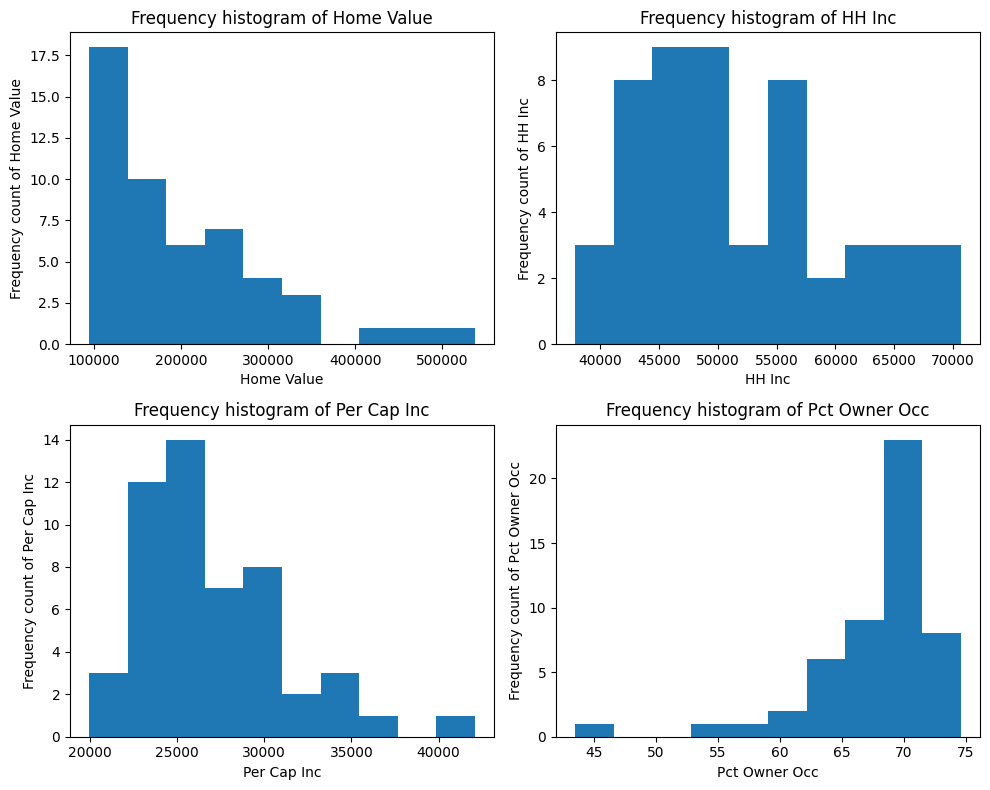

In [17]:
k=0
fig,axis = plt.subplots(2,2, figsize=(10, 8))
for i in range (axis.shape[0]): #0: cột
  for j in range (axis.shape[1]): #1: dòng
    axis[i][j].hist(data[var[k]])
    axis[i][j].set_ylabel('Frequency count of ' + var[k])
    axis[i][j].set_xlabel(var[k]);
    axis[i][j].set_title('Frequency histogram of ' + var[k])
    k+=1
fig.tight_layout() #Căn chỉnh giữa các biểu đồ
plt.show()

### <marquee direction="left"> <span style="color:palevioletred"> *3/ Tạo biểu đồ boxplots cho mỗi biến. Lưu ý mỗi chart cần có tiêu đề và các trục của biểu đồ cần được ghi chú rõ ràng.* </span> </marquee>

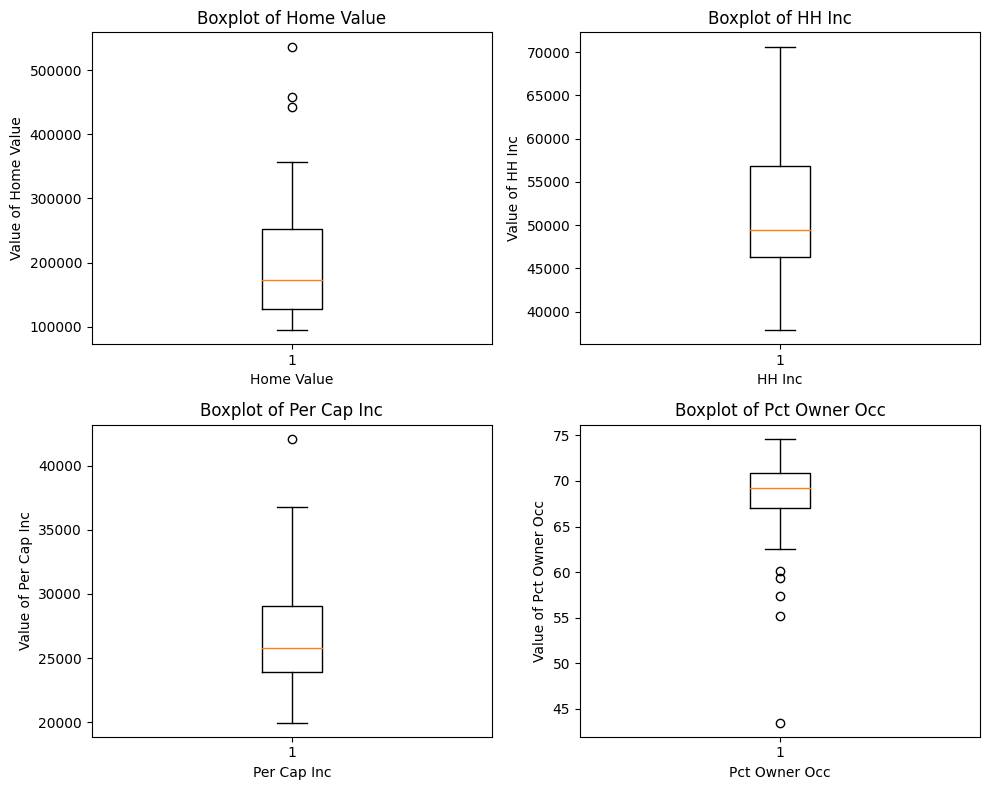

In [8]:
k=0
fig,axis = plt.subplots(2,2, figsize=(10, 8))
for i in range (axis.shape[0]):
  for j in range (axis.shape[1]):
    axis[i][j].boxplot(data[var[k]])
    axis[i][j].set_ylabel('Value of ' + var[k])
    axis[i][j].set_xlabel(var[k])
    axis[i][j].set_title('Boxplot of ' + var[k])
    k+=1
fig.tight_layout()
plt.show()

### <marquee direction="left"> <span style="color:palevioletred"> *4/ Tạo biểu đồ điểm (scatterplots) cho mỗi biến trong tương quan với 1 biến khác (gợi ý: bạn sẽ cần phải vẽ 6 scatterplots). Lưu ý mỗi chart cần có tiêu đề và các trục của biểu đồ cần được ghi chú rõ ràng.* </span> </marquee>

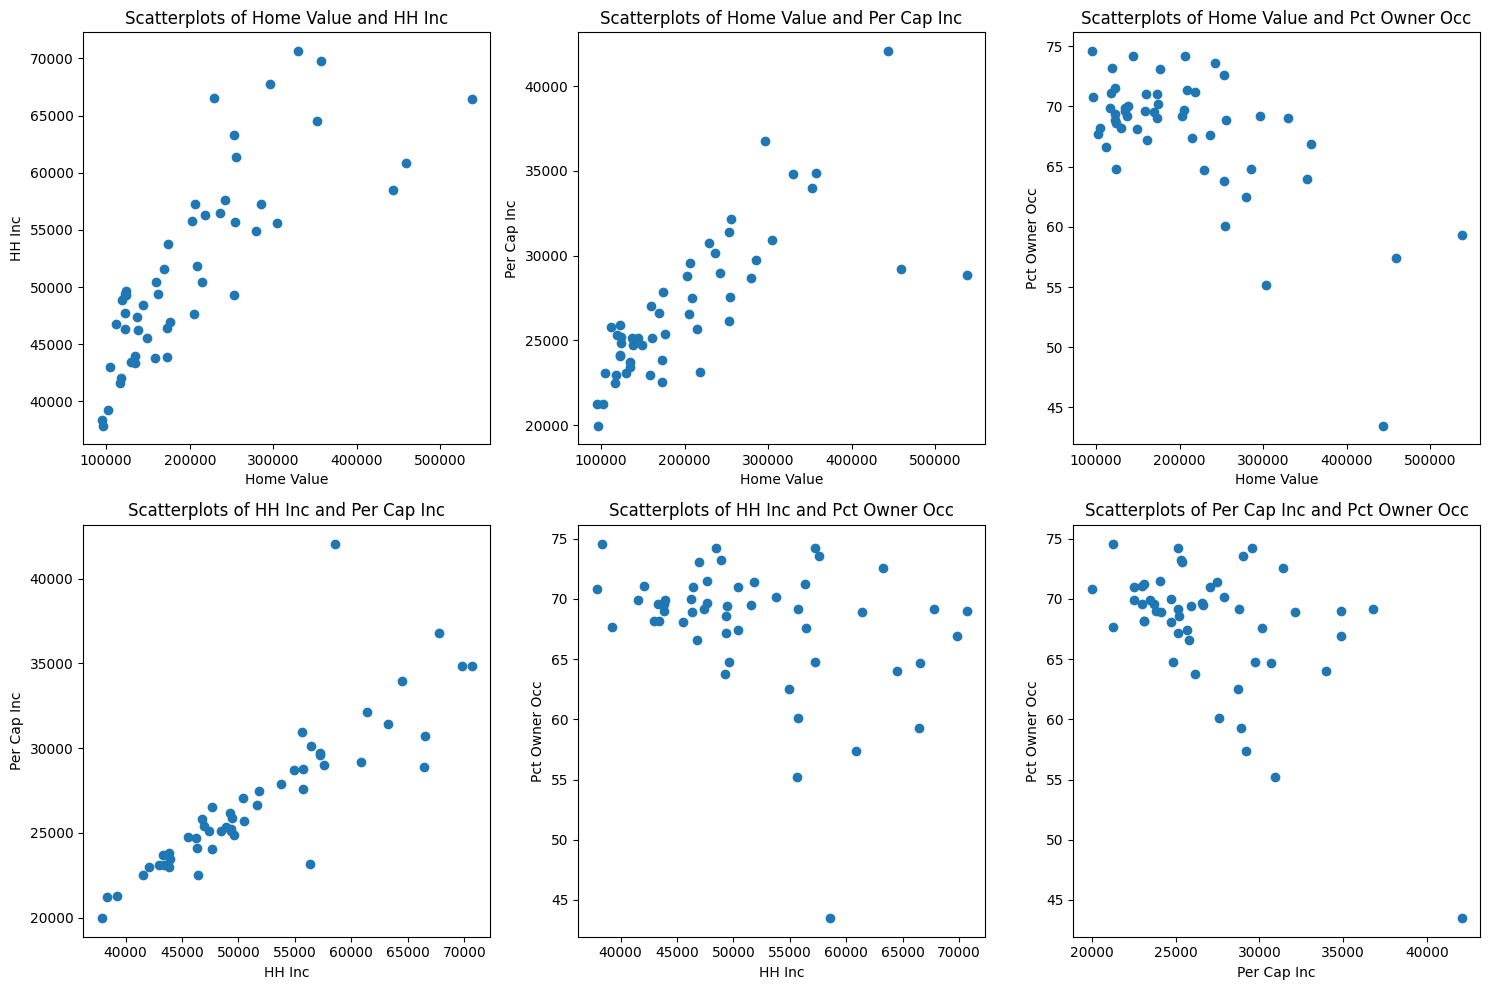

In [14]:
k=0

fig,axis = plt.subplots(2,3, figsize=(15, 10))
for i in range (axis.shape[0]):
  for j in range (axis.shape[1]):
    if (k+j+1)<=3:
      axis[i][j].scatter(data[var[k]],data[var[k+j+1]])
      axis[i][j].set_ylabel(var[k+j+1])
      axis[i][j].set_xlabel(var[k]);
      axis[i][j].set_title('Scatterplots of ' + var[k] + ' and ' + var[k+j+1])
    else:
      axis[i][j].scatter(data[var[k+1]],data[var[k+2]])
      axis[i][j].set_ylabel(var[k+2])
      axis[i][j].set_xlabel(var[k+1])
      axis[i][j].set_title('Scatterplots of ' + var[k+1] + ' and ' + var[k+2])
  k+=1
fig.tight_layout()
plt.show()

### <marquee direction="left"> <span style="color:palevioletred"> *5/ Tính toán correlation coefficient của mỗi biến với các biến còn lại. Trình bày thành 1 bảng.* </span> </marquee>

In [10]:
info = []
for i in range(len(var)):
  for j in range(len(var)):
      info.append((var[i]
                  , var[j]
                  ,round(data[var[i]].corr(data[var[j]]),2)))

In [11]:
info

[('Home Value', 'Home Value', 1.0),
 ('Home Value', 'HH Inc', 0.8),
 ('Home Value', 'Per Cap Inc', 0.77),
 ('Home Value', 'Pct Owner Occ', -0.66),
 ('HH Inc', 'Home Value', 0.8),
 ('HH Inc', 'HH Inc', 1.0),
 ('HH Inc', 'Per Cap Inc', 0.86),
 ('HH Inc', 'Pct Owner Occ', -0.34),
 ('Per Cap Inc', 'Home Value', 0.77),
 ('Per Cap Inc', 'HH Inc', 0.86),
 ('Per Cap Inc', 'Per Cap Inc', 1.0),
 ('Per Cap Inc', 'Pct Owner Occ', -0.53),
 ('Pct Owner Occ', 'Home Value', -0.66),
 ('Pct Owner Occ', 'HH Inc', -0.34),
 ('Pct Owner Occ', 'Per Cap Inc', -0.53),
 ('Pct Owner Occ', 'Pct Owner Occ', 1.0)]

In [12]:
df_correlation_coefficient = pd.DataFrame(data = info, columns = ['VarA', 'VarB', 'correlation coefficient'])
df_correlation_coefficient = df_correlation_coefficient[df_correlation_coefficient["correlation coefficient"] != 1.0]
df_correlation_coefficient = df_correlation_coefficient.drop_duplicates(subset=["correlation coefficient"], keep='first',ignore_index=True)
df_correlation_coefficient

,VarA,VarB,correlation coefficient
0,Home Value,HH Inc,0.80
1,Home Value,Per Cap Inc,0.77
2,Home Value,Pct Owner Occ,-0.66
3,HH Inc,Per Cap Inc,0.86
4,HH Inc,Pct Owner Occ,-0.34
5,Per Cap Inc,Pct Owner Occ,-0.53


# <span style="color:mediumslateblue"> Trình bày </span>

### <marquee direction="left"> <span style="color:palevioletred"> *a) Trình bày bảng dữ liệu có được ở bước 1 thể hiện gì về mức độ tập trung và sự phân phối dữ liệu của từng biến (the central tendency, variability and distribution of each variable).* </span> </marquee>

<span style="color:mediumslateblue">- Trung bình biến Home Value là hơn 200 nghìn đô; với giá trị trung vị = 1733000 đô, nghĩa là khi sắp xếp các giá trị tăng dần, thì có một nửa số liệu nhỏ hơn hoặc bằng 173300 đô và một nửa còn lại bằng hoặc lớn hơn 173300 đô; chêch lệch giữa giá trị trung bình và trung vị khá lớn, tức số liệu của giá nhà có ngoại lệ tác động làm trung bình cao hơn nhiều lần trung vị; các giá trị của biến có khoảng biến thiên khá lớn; với độ lệch chuẩn khá lớn, nghĩa là các giá trị của biến phân tán rộng, khoảng cách đến giá trị trung bình lớn, giá nhà ở mỗi bang của Mỹ dao động lớn, mức độ ổn định của giá nhà ở Mỹ nhỏ. </span>

<span style="color:mediumslateblue">- Trung bình thu nhập hộ gia đình HH Inc hơn 51 nghìn đô, với giá trị trung vị = 49424 đô, nghĩa là khi sắp xếp các giá trị tăng dần, thì có một nửa số liệu nhỏ hơn hoặc bằng 49424 đô và một nửa còn lại bằng hoặc lớn hơn 49424 đô; chênh lệch giữa giá trị trung bình và trung vị không lớn bao nhiêu, có thể số liệu HH Inc không có ngoại lệ; các giá trị của biến dàn trải không lớn, với độ lệch chuẩn khá nhỏ, nghĩa là các giá trị của biến có độ tập trung lớn, thu nhập của hộ gia đình ở mỗi bang của Mỹ dao động nhỏ, nghĩa là thu nhập của các hộ gia đình ở Mỹ có phân bố khá đều. </span>

<span style="color:mediumslateblue">- Trung bình thu nhập trên đầu người Per Cap Inc hơn 26 nghìn đô, với giá trị trung vị = 25803 đô, nghĩa là khi sắp xếp các giá trị tăng dần, thì có một nửa số liệu nhỏ hơn hoặc bằng 25803 đô và một nửa còn lại bằng hoặc lớn hơn 25803 đô; giá trị trung bình và trung vị chênh lệch không lớn; số liệu về thu nhập đầu người phân tán bình thường, dàn trải với độ lệch chuẩn và khoảng biến thiên khá nhỏ, gần giá trị trung bình, nghĩa là mỗi người dân ở mỗi bang của Mỹ có thu nhập chênh lệch nhau lớn nhưng không đáng kể.</span>

<span style="color:mediumslateblue">- Tỷ lệ phần trăm số nhà có chủ sở hữu Pct Owner Occ, có trung bình hơn 60 nghìn đô, với giá trị trung bị = 69.2%, nghĩa là khi sắp xếp các giá trị tăng dần, thì có một nửa số liệu nhỏ hơn hoặc bằng 69.2% và một nửa còn lại bằng hoặc lớn hơn 69.2%; giá trị trung bình và trung vị chênh lệch nhau không lớn; số liệu về tỷ lệ phần trăm số nhà có chủ phân tán bình thường, tập trung gần giá trị trung bình, nghĩa là số lượng nhà không có chủ và có chủ ở mỗi bang của Mỹ phân phối bình thường. </span>

|<span style="color:mediumslateblue"> index </span> |<span style="color:mediumslateblue"> Var </span>|<span style="color:mediumslateblue"> mean </span>|<span style="color:mediumslateblue"> median </span>|<span style="color:mediumslateblue"> range </span>|<span style="color:mediumslateblue"> standard deviation </span>|
|---|---|---|---|---|---|
<span style="color:mediumslateblue"> 0 </span>|Home Value|204107.84|173300.0|442900.0|98746.57|
<span style="color:mediumslateblue"> 1 </span>|HH Inc|51776.39|49424.0|32766.0|8357.42|
<span style="color:mediumslateblue"> 2 </span>|Per Cap Inc|26983.20|25803.0|22101.0|4329.31|
<span style="color:mediumslateblue"> 3 </span>|Pct Owner Occ|67.87|69.2|31.1|5.38|

### <marquee direction="left"> <span style="color:palevioletred"> *b) Trình bày các frequency histograms ở bước 2 và các boxplots ở bước 3 hỗ trợ và giúp làm rõ các nhận được ở bước 1 như thế nào. Từ bước 1 và bước 2, hãy tìm ra các outliers đối với từng biến.* </span> </marquee>

<span style="color:mediumslateblue">- Biểu đồ phân phối của Home Value có phân phối lệch phải, giá nhà tập trung nhiều trong khoảng từ 100 nghìn đô đến dưới 200 nghìn đô, và có một vài giá trị ngoại lệ dao động trong khoảng trên 400 nghìn đô đến khoảng dưới 600 nghìn đô. Cụ thể trong biểu đồ hộp, ta thấy có 3 giá trị ngoại lệ lớn hơn 400 nghìn đô. </span>

<span style="color:mediumslateblue">- Biểu đồ phân phối của HH Inc có phân phối gần giống hình chuông, gần như phân phối chuẩn, thu nhập trung bình của hộ gia đình tập trung nhiều trong khoảng trên 450 nghìn đô đến dưới 550 nghìn đô. Rõ ràng, theo biểu đồ hộp, không có giá ngoại lệ. </span>

<span style="color:mediumslateblue">- Biểu đồ phân phối của Per Cap Inc có phân phối lệch phải, thu nhập mỗi người dân ở mỗi bang của Mỹ tập trung nhiều trong khoảng trên 20 nghìn đô đến dưới 30 nghìn đô, và giá trị ngoại lệ cao hơn 40 nghìn đô. Qua biểu đồ hộp, thấy rõ có một giá trị ngoại lệ cao hơn 40 nghìn đô. </span>

<span style="color:mediumslateblue">- Biểu đồ phân phối của Pct Owner Occ có phân phối lệch trái, phần trăm nhà có chủ sở hữu khá lớn và tập trung nhiều trong khoảng trên 65% đến dưới 75%, có một vài giá trị ngoại lệ dưới 60%. Dễ thấy, trong biểu đồ hộp, có 5 giá trị ngoại lệ bé hơn 60%. </span>

* ##### <span style="color:mediumslateblue"> Frequency histograms </span>

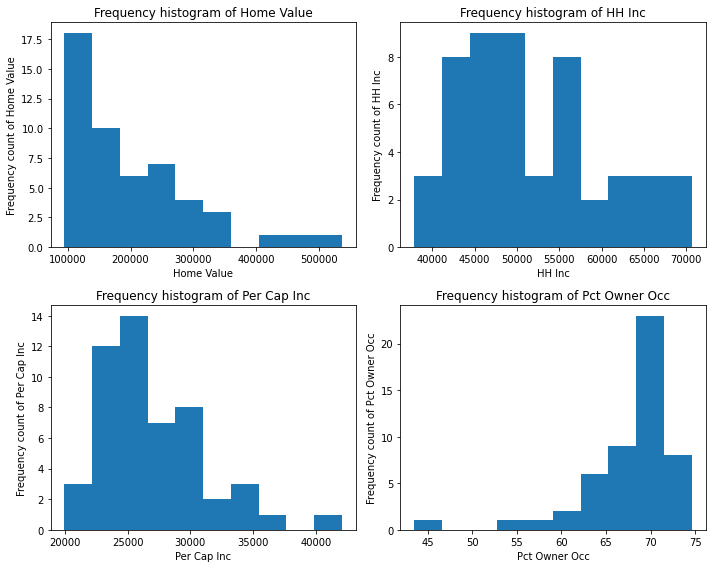

* ##### <span style="color:mediumslateblue"> Boxplots </span>

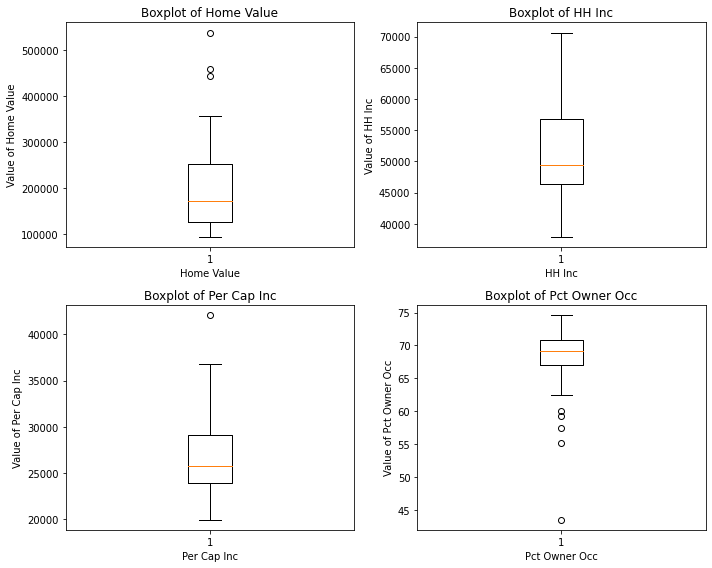

### <marquee direction="left"> <span style="color:palevioletred"> *c) Trình bày các biểu đồ scatterplots ở bước 4 và correlation coefficients ở bước 5 thể hiện gì về mối quan hệ giữa các cặp biến (Ví dụ: các biến có quan hệ với nhau không?, các mối quan hệ đó có vẻ là tuyến tính (linear) hay phi tuyến tính (nonlinear)?, các mối quan hệ đó là tương quan đồng biến hay nghịch biến (positive or negative)?* </span> </marquee>

<span style="color:mediumslateblue">- HH Inc có tương quan tuyến tính thuận với Home value, nghĩa là khi thu nhập hộ gia đình thì giá nhà tăng, tức khi thu nhập gia đình cao thì các gia đình có nhu cầu mua nhà cao, cầu ít cung nhiều nên giá nhà buộc phải tăng, và ngược lại. Với hệ số tương quan là 0.8, gần bằng một, mối quan hệ rất mạnh. </span>

<span style="color:mediumslateblue">- Per Cap Inc có tương quan tuyến tính thuận với Home value, nghĩa là khi thu nhập trên đầu người tăng thì giá nhà cũng tăng, tức khi thu nhập cá nhân tăng thì họ có nhu cầu mua nhà, cầu ít cung nhiều nên giá nhà tăng cao và ngược lại. Với hệ số tương quan tuyến tính là 0.77, tương quan khá mạnh.</span>

<span style="color:mediumslateblue">- Home value có tương quan tuyến tính nghịch với Pct Owner Occ, nghĩa là khi giá nhà tăng thì tỷ lệ những ngôi có chủ sở hữu thấp, tức giá nhà cao thì ít người mua, và ngược lại. Với hệ số tương quan tuyến tính là 0.66, tương quan khá mạnh. </span>

<span style="color:mediumslateblue">- HH Inc có tương quan tuyến tính thuận với Per Cap Inc, nghĩa là khi thu nhập cá nhân tăng thì phần đóng góp cho tổng thu nhập của gia đình cũng tăng, và ngược lại. Với hệ số tương quan tuyến tính là 0.86, gần bằng 1, mối tương quan rất mạnh. </span>

<span style="color:mediumslateblue">- Theo bảng hệ số tương quan, mối quan hệ giữa HH Inc và Pct Owner Occ là nghịch và có hệ số tương quan khá nhỏ là -0.34, tiến gần bằng 0, đây là mối quan hệ tuyến tính nghịch rất yếu. Nghĩa là thu nhập gia đình tăng, thì tỷ lệ ngôi nhà có chủ sở hữu giảm, tức khi thu nhập gia đình cao thì các gia đình có nhu cầu mua nhà cao, cầu ít cung nhiều nên giá nhà buộc phải tăng dẫn đến tỷ lệ những ngôi nhà có chủ sở hữu sẽ giảm. </span>

<span style="color:mediumslateblue">- Per Cap Inc có tương quan nghịch với Pct Owner Occ, nghĩa là thu nhập cá nhân tăng, thì tỷ lệ ngôi nhà có chủ sở hữu giảm, tức khi thu nhập mỗi cá nhân tăng thì họ có nhu cầu mua nhà, cầu ít cung nhiều nên giá nhà tăng cao, dẫn đến ít cá nhân có thể mua được nhà, nên tỷ lệ nhà có chủ sở hữu giảm. Với hệ số tương quan là -0.53, tương quan nghịch khá mạnh. </span>

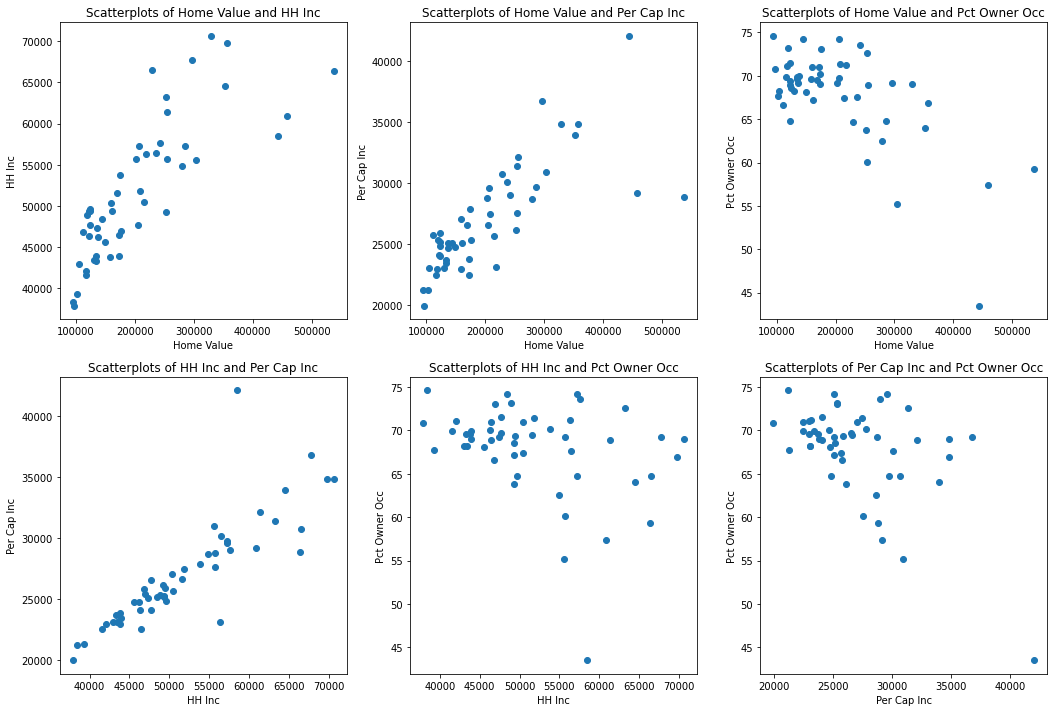

### <marquee direction="left"> <span style="color:palevioletred"> *d) Trong các biến HH Inc , Per Cap Inc và Pct Owner Occ thì biến nào có mối quan hệ mạnh nhất với Home Value?* </span> </marquee>

<span style="color:mediumslateblue">Trong các biến HH Inc , Per Cap Inc và Pct Owner Occ thì biến HH Inc có mối quan hệ mạnh nhất với Home Value </span>

|<span style="color:mediumslateblue">index</span>|<span style="color:mediumslateblue">VarA</span>|<span style="color:mediumslateblue">VarB</span>|<span style="color:mediumslateblue">correlation coefficient</span>|
|---|---|---|---|
|<span style="color:mediumslateblue">0</span>|Home Value|HH Inc|0.80|
|<span style="color:mediumslateblue">1</span>|Home Value|Per Cap Inc|0.77|
|<span style="color:mediumslateblue">2</span>|Home Value|Pct Owner Occ|-0.66|
|<span style="color:mediumslateblue">3</span>|HH Inc|Per Cap Inc|0.86|
|<span style="color:mediumslateblue">4</span>|HH Inc|Pct Owner Occ|-0.34|
|<span style="color:mediumslateblue">5</span>|Per Cap Inc|Pct Owner Occ|-0.53|

 # <marquee direction="right"> <span style="color:palevioletred"> &#10084; &#9758;&#9756; </span> </marquee>
 

 ### <marquee > <span style="color:palevioletred"> HẾT </span> </marquee>